# 283. Канатная дорога

Одному альпинисту очень нравится посещать вершины Уральских гор. Известно, что Уральский хребет не славится высокими горами, однако, его протяжённость впечатляет. Поэтому посещение всех вершин занимает ужасно много времени. Чтобы ускорить этот процесс, альпинист решил построить канатную дорогу.

В качестве отправной точки альпинист выбрал центр своего города. Затем определил координаты всех вершин, относительно этого центра. Оказалось, что все они лежат на одной прямой. Для начала, альпинист решил последовательно соединить вершины канатной дорогой, начиная от центра города. Однако, некоторые горы на этом маршруте оказались слишком низкими и скучными. Поэтому альпинист также решил соединить каждую вершину со следующей, не меньшей по высоте, если такая существует.

План альпиниста очень понравился мэру города! Чтобы правильно составить смету, он попросил вас вычислить суммарную длину такой канатной дороги. Вы против коррупции, поэтому решили произвести расчеты максимально точно.

**Формат ввода**

Первая строка входных данных содержит целое число $N (1≤N≤2⋅10^5)$ — количество горных вершин, через которые пройдет канатная дорога. Каждая из следующих $N$ строк содержит два целых числа $x_i, y_i (1≤x_i, y_i≤10^9)$ — расстояние и высота каждой вершины относительно центра города. Все вершины имеют различные расстояния от центра города и заданы в порядке их возрастания.

**Формат вывода**

В единственной строке выведите одно число — суммарную длину канатной дороги.

Ваш ответ будет засчитан, если относительная или абсолютная погрешность не будет превышать $10^(-9)$.

**Примечание**

В первом тесте правильный ответ достигается последовательным соединением центра города и всех горных вершин, а также дополнительным соединением первой вершины с третьей и третьей вершины с пятой.

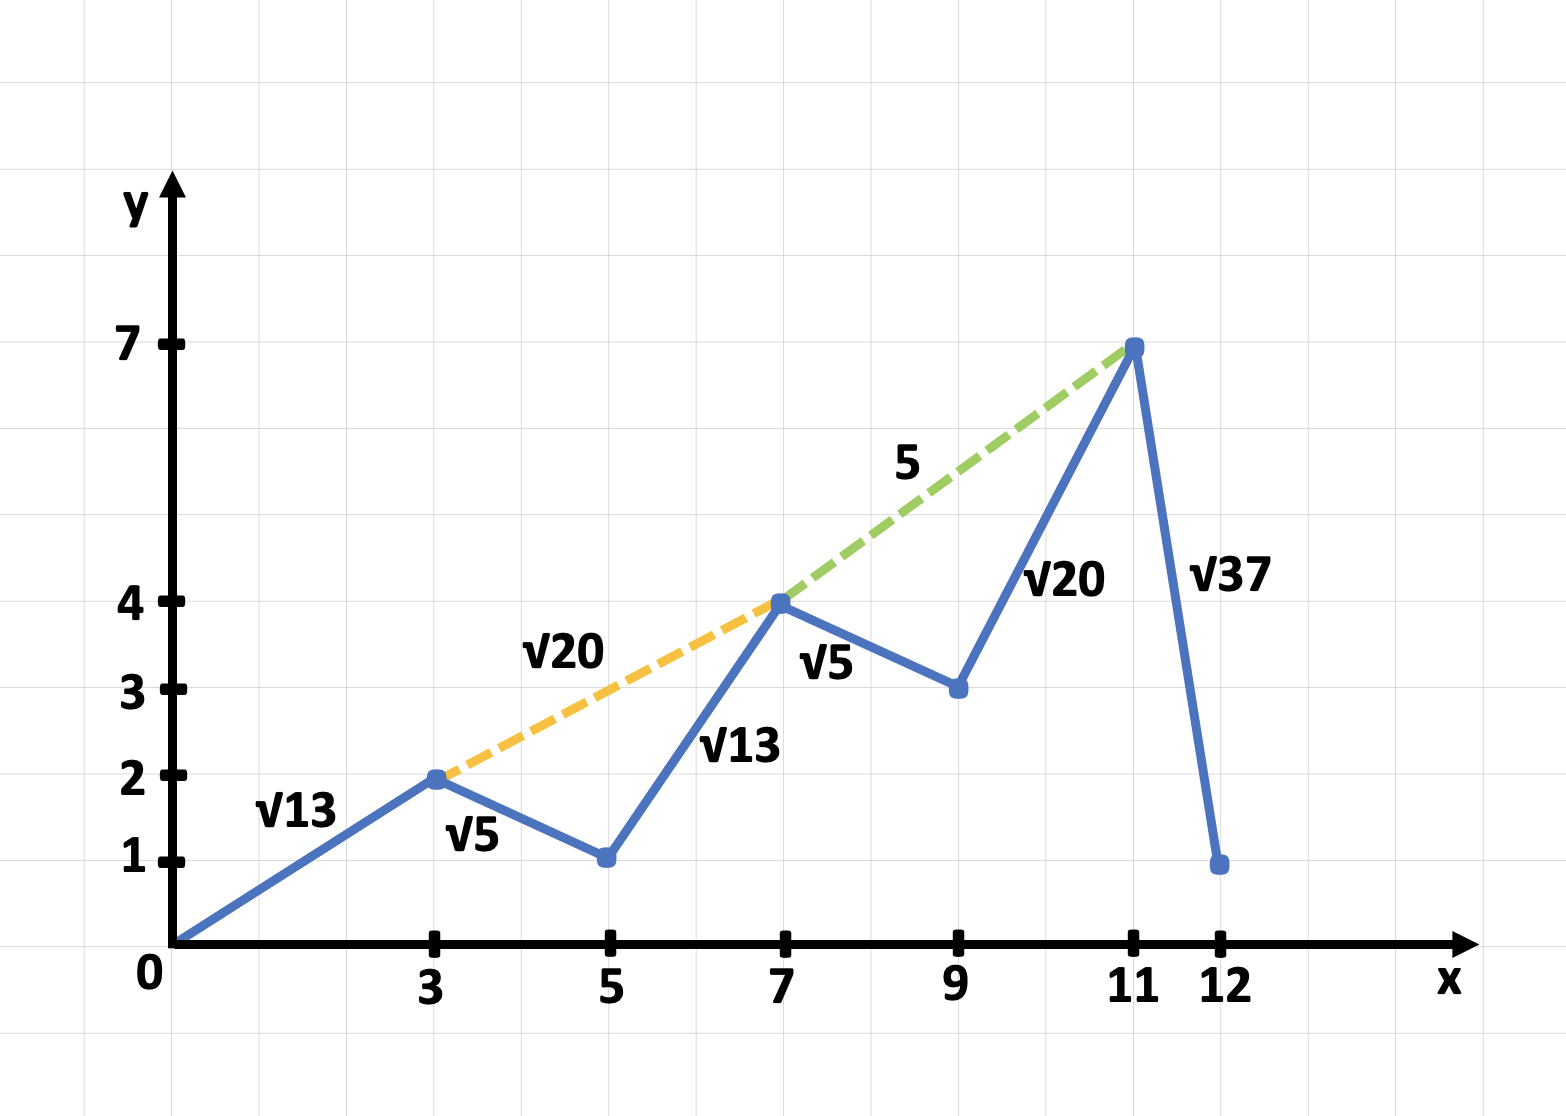

In [ ]:
import numpy as np

def len_segment(a, b):
    return ((a[0] - b[0])**2 + (a[1] - b[1])**2)**0.5

def find_next_greater(arr):
    result = []
    stack = []
    res = 0

    for i in range(len(arr)):
        if i + 1 < len(arr):
            res += len_segment(coords[i], coords[i+1])
        # Если стек не пуст и текущий элемент больше элемента на вершине стека,
        # то найден следующий больший элемент для элемента на вершине стека
        while stack and arr[i][1] >= arr[stack[-1]][1]:
            curr_index = stack.pop()
            # Проверяем, что найденный элемент не соседний с предыдущим
            if curr_index != i - 1:
                result.append([curr_index, i])
                res += len_segment(arr[curr_index], arr[i])
        stack.append(i)
    
    return res

# считывание данных
coords = [[0,0]]
for i in range(int(input())):
    coords.append(list(map(int, input().split())))

print(find_next_greater(coords))

*Из интересных наблюдений и выводов, если есть возможность делать прямую операцию над списками, то лучше так и делать, чем добавлять numpy (как п*ример операция **0.5 дала прирост в скорости чтобы пройти еще 10 тестов, чем операция np.sqrt())